In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
# color = sns.color_palette()
color = None
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

# EDA

In [2]:
# Import DataFrame using Pandas

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
863,864,20,RL,70.0,7931,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2009,WD,Normal,132500
1322,1323,60,RL,107.0,10186,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190000
229,230,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,192500
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
67,68,20,RL,72.0,10665,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,226000


In [4]:
train_id = train.Id
test_id = test.Id

# Drop "Id"
train.drop('Id',axis =1 , inplace = True)
test.drop('Id',axis =1 , inplace = True)

# Missing Data

In [5]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['SalePrice']
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [6]:
missing_columns =list(all_data.columns[all_data.isnull().any()])


missing_data = pd.DataFrame({"Columns" : missing_columns,                             
                            "Type": '',
                            "Unique Value" : '',
                            "Percentage" : ''})
# Find Unique Values
missing_data['Unique Value']  = missing_data.apply(lambda x: list(set(all_data[x['Columns']].dropna())),axis = 1)

#Percentage of missingless
missing_data['Percentage']  = missing_data.apply(lambda x: all_data[x['Columns']].isnull().sum()/ len(all_data[x['Columns']])*100,axis = 1)
missing_data['Total Missing'] = missing_data.apply(lambda x: all_data[x['Columns']].isnull().sum(),axis = 1)
def check_type(list_):
    if all([isinstance(word, float) for word in list_]):
        return "float"
    if all([isinstance(word, str) for word in list_]):
        return "string"
    if all([isinstance(word, int) for word in list_]):
        return "int"

# Are values categorical or numerical
missing_data["Type"] = missing_data.apply(lambda x: check_type(x['Unique Value']),axis =1 )

missing_data.sort_values(by = "Percentage", ascending = False).reset_index(drop= True)

,Columns,Type,Unique Value,Percentage,Total Missing
0,PoolQC,string,"[Ex, Gd, Fa]",99.657417,2909
1,MiscFeature,string,"[TenC, Gar2, Shed, Othr]",96.402878,2814
2,Alley,string,"[Grvl, Pave]",93.216855,2721
3,Fence,string,"[MnWw, GdPrv, MnPrv, GdWo]",80.438506,2348
4,FireplaceQu,string,"[TA, Fa, Gd, Ex, Po]",48.646797,1420
5,LotFrontage,float,"[21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 30.0, 31....",16.649538,486
6,GarageCond,string,"[TA, Fa, Gd, Ex, Po]",5.447071,159
7,GarageQual,string,"[TA, Fa, Gd, Ex, Po]",5.447071,159
8,GarageYrBlt,float,"[2207.0, 1895.0, 1896.0, 1900.0, 1906.0, 1908....",5.447071,159
9,GarageFinish,string,"[Fin, Unf, RFn]",5.447071,159


Text(0.5, 1.0, 'Percent missing data by feature')

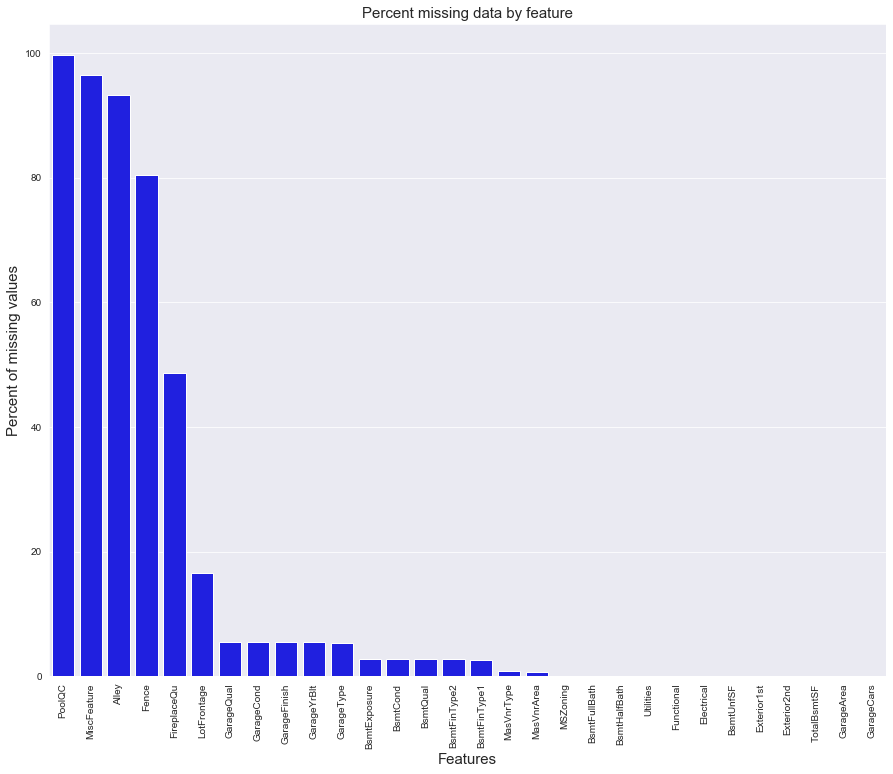

In [7]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na, color = 'blue')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

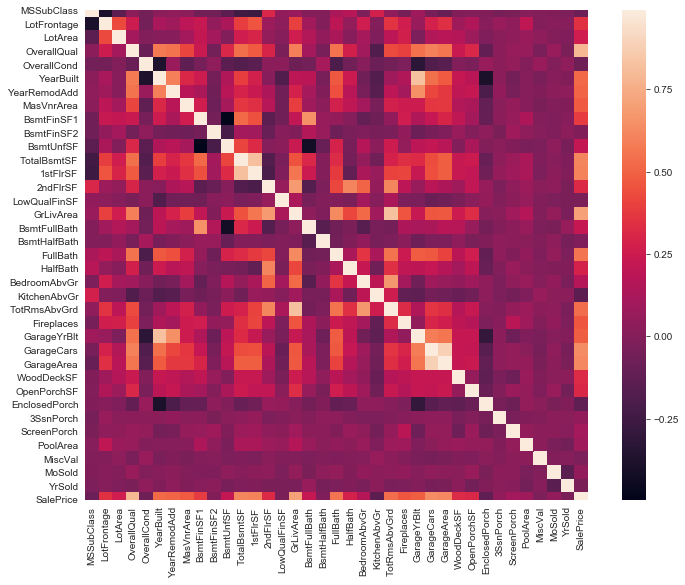

In [8]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.99, square=True)

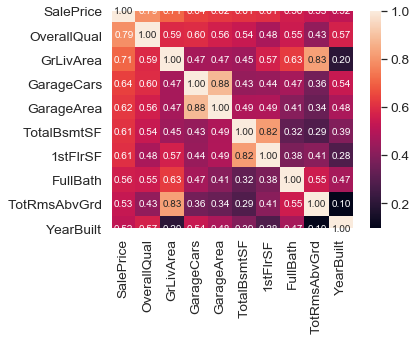

<Figure size 432x288 with 0 Axes>

In [9]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig('saleprice_corr.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


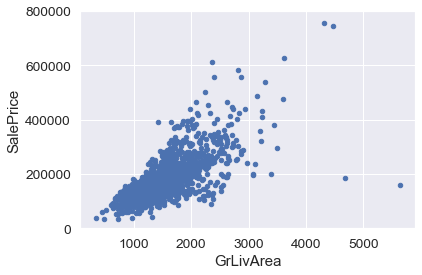

In [10]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## Timeseries Data

In [11]:
 from datetime import datetime, date, time

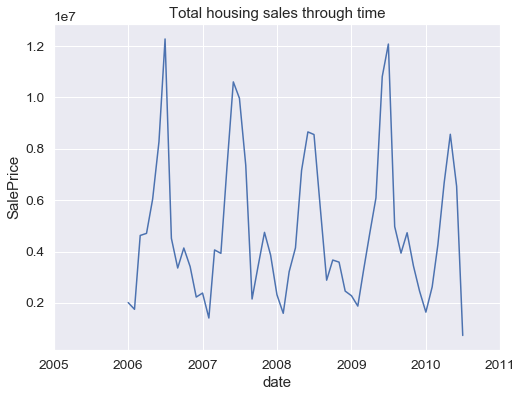

In [12]:
df = train[['SalePrice','MoSold', 'YrSold']]
df['date'] = list(map(lambda yr,mo: date(yr,mo,1),df['YrSold'],df['MoSold']))
df= df.groupby('date').sum().reset_index()

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.lineplot(x='date', y='Total Sales Price', data=df)
fig.axis(xmin=date(2005,1,1), xmax=date(2011,1,1))
plt.title("Total housing sales through time");
# fig.axis(ymin=0, ymax=800000);
# test.plot(x='date', y='SalePrice', style=".")

# test.plot.scatter(x='date' , y= 'SalePrice',ylim=(0,800000))

#scatter plot grlivarea/saleprice
# var = 'GrLivArea'
# data = pd.concat([test['SalePrice'], test.index])
# data.plot.scatter(x=test.index, y='SalePrice', ylim=(0,800000));

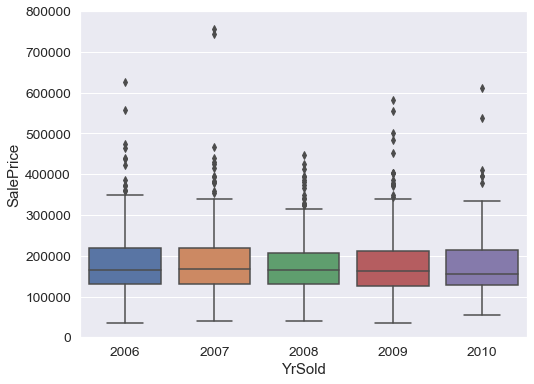

In [13]:
#box plot overallqual/saleprice
var = 'YrSold'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

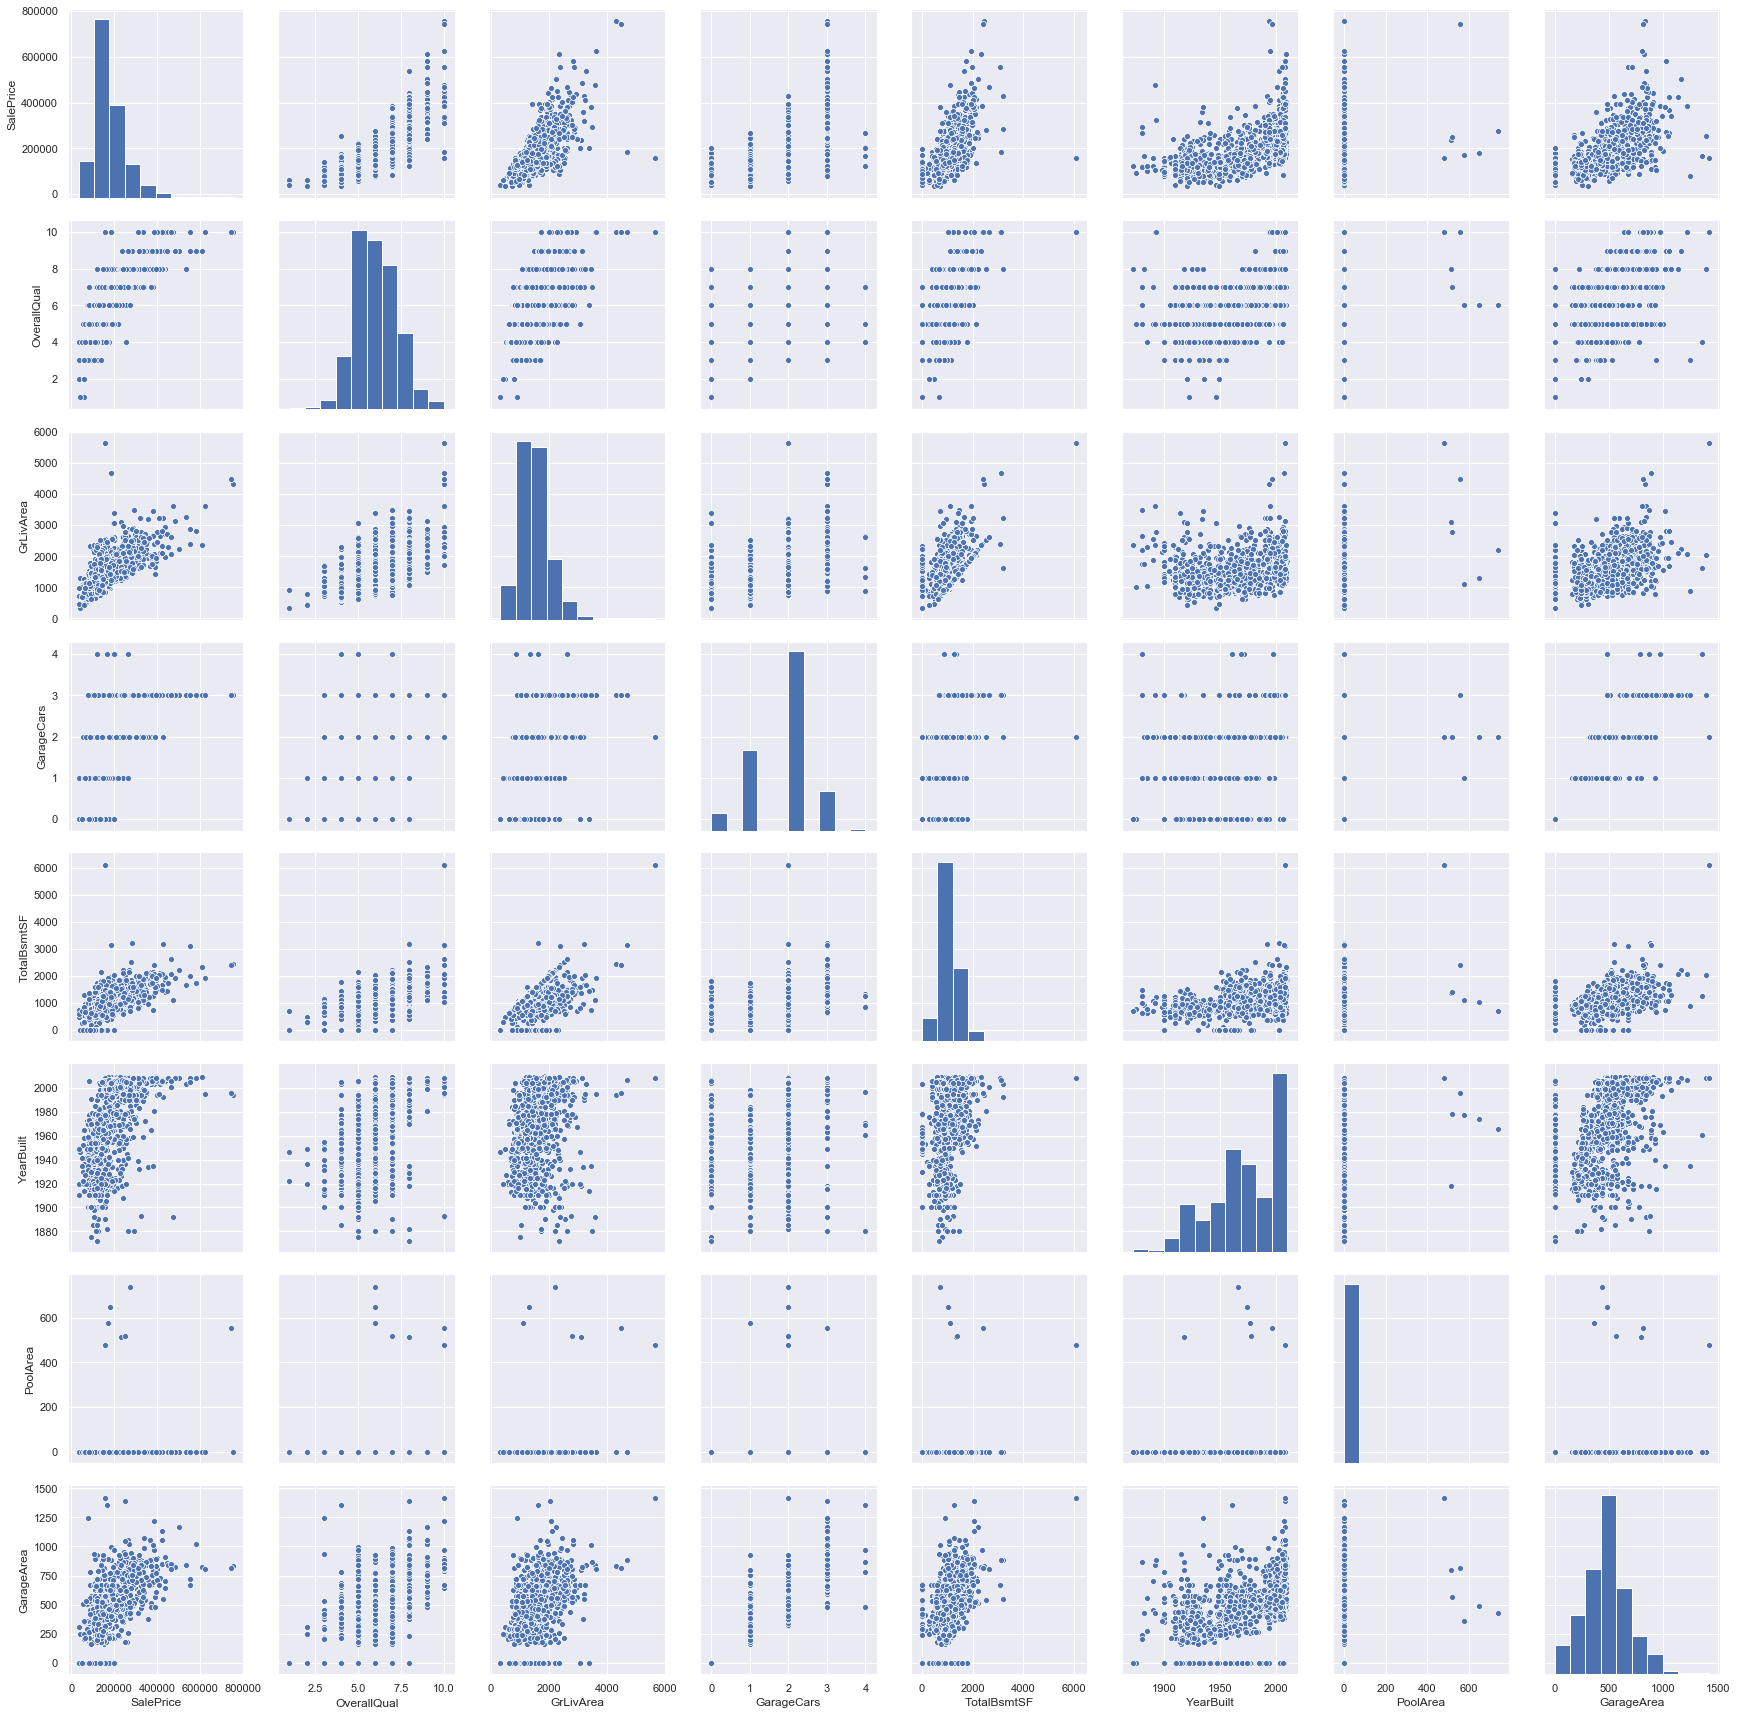

In [14]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt','PoolArea','GarageArea']
sns.pairplot(train[cols], size = 3)
plt.show();

In [15]:
# print ("Drop outliers from train: {}".format(list(train[train.GrLivArea > 4500].index)))
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.reset_index(drop = True)
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['SalePrice']
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

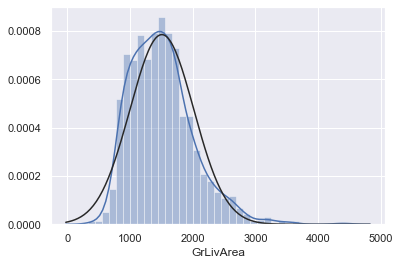

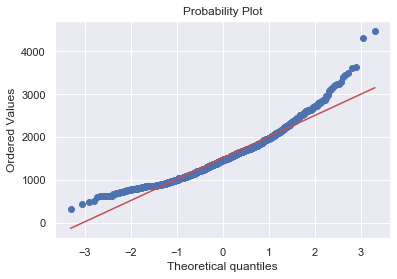

In [16]:
#histogram and normal probability plot
sns.distplot(train.GrLivArea, fit=norm);
fig = plt.figure()
res = stats.probplot(train.GrLivArea, plot=plt)

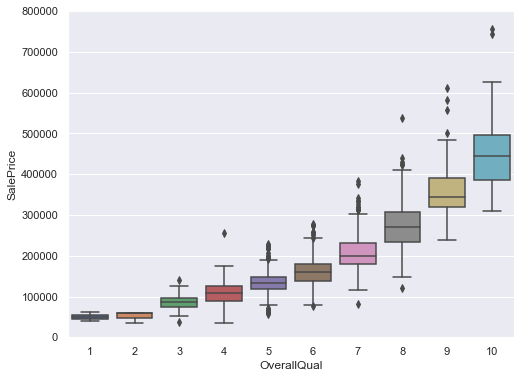

In [17]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### Imputing missing values

* **PoolQC**      data_description shows NA mean "No Pool"
* **MiscFeature** data_description shows NA mean "no Misc Feature"
* **Alley**       data_description shows NA mean "no Alley access"
* **Fence**       data_description shows NA mean "no Fence"
* **FireplaceQu**       data_description shows NA mean "no fireplace"

In [18]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

* **GarageType, GarageFinish, GarageQual and GarageCond** data_description shows NA mean "No Garage"

In [19]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

* **GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [20]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

* **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : data_description shows NA mean "No Basement", Therefore, filling it to 0

In [21]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

* **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : data_description shows NA mean "No Basement"

In [22]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

* **MasVnrArea and MasVnrType** :  data_description shows NA mean "No masonry" and fill numeric to 0


In [23]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

* **MSZoning** 'RL' is by far the most common value. So we can fill in missing values with 'RL'


In [24]:
all_data['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [25]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

* **Utilities**

In [26]:
all_data['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [27]:
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])

* **Functional** data description says NA means typical

In [28]:
all_data['Functional'].value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [29]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

* **Electrical** It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.


In [30]:
all_data['Electrical'].value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [31]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

* **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.


In [32]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [33]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

* **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [34]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

* **SaleType** : Fill in again with most frequent which is "WD"

In [35]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

* **MSSubClass** : Na most likely means No building class. We can replace missing values with None

In [36]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [37]:
missing_columns =list(all_data.columns[all_data.isnull().any()])


missing_data = pd.DataFrame({"Columns" : missing_columns,                             
                            "Type": '',
                            "Unique Value" : '',
                            "Percentage" : ''})
# Find Unique Values
missing_data['Unique Value']  = missing_data.apply(lambda x: list(set(all_data[x['Columns']].dropna())),axis = 1)

#Percentage of missingless
missing_data['Percentage']  = missing_data.apply(lambda x: all_data[x['Columns']].isnull().sum()/ len(all_data[x['Columns']])*100,axis = 1)
missing_data['Total Missing'] = missing_data.apply(lambda x: all_data[x['Columns']].isnull().sum(),axis = 1)
def check_type(list_):
    if all([isinstance(word, float) for word in list_]):
        return "float"
    if all([isinstance(word, str) for word in list_]):
        return "string"
    if all([isinstance(word, int) for word in list_]):
        return "int"

# Are values categorical or numerical
missing_data["Type"] = missing_data.apply(lambda x: check_type(x['Unique Value']),axis =1 )

missing_data.sort_values(by = "Percentage", ascending = False).reset_index(drop= True)

,Columns,Type,Unique Value,Percentage,Total Missing
0,LotFrontage,float,"[21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 30.0, 31....",16.660953,486


In [38]:
from fancyimpute import KNN   
# df_knn = all_data[['GrLivArea','LotArea','Neighborhood','LotFrontage']]
index = pd.get_dummies(all_data).columns.get_loc('LotFrontage')
df_knn = pd.get_dummies(all_data)

df_knn = pd.DataFrame(KNN(k=3).fit_transform(df_knn))
knn_LotFrontage = df_knn.iloc[:,index]
all_data['LotFrontage'] = knn_LotFrontage

Using TensorFlow backend.


Imputing row 1/2917 with 0 missing, elapsed time: 9.673
Imputing row 101/2917 with 1 missing, elapsed time: 9.674
Imputing row 201/2917 with 0 missing, elapsed time: 9.675
Imputing row 301/2917 with 0 missing, elapsed time: 9.676
Imputing row 401/2917 with 0 missing, elapsed time: 9.677
Imputing row 501/2917 with 0 missing, elapsed time: 9.678
Imputing row 601/2917 with 0 missing, elapsed time: 9.679
Imputing row 701/2917 with 0 missing, elapsed time: 9.679
Imputing row 801/2917 with 0 missing, elapsed time: 9.680
Imputing row 901/2917 with 0 missing, elapsed time: 9.681
Imputing row 1001/2917 with 0 missing, elapsed time: 9.682
Imputing row 1101/2917 with 0 missing, elapsed time: 9.683
Imputing row 1201/2917 with 0 missing, elapsed time: 9.684
Imputing row 1301/2917 with 0 missing, elapsed time: 9.685
Imputing row 1401/2917 with 0 missing, elapsed time: 9.686
Imputing row 1501/2917 with 0 missing, elapsed time: 9.687
Imputing row 1601/2917 with 0 missing, elapsed time: 9.688
Imputing 

In [39]:
na_index = all_data[all_data.LotFrontage.isna()].index

In [40]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
# all_data["LotFrontage"] 
all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2912     21.0
2913     21.0
2914    160.0
2915     62.0
2916     74.0
Name: LotFrontage, Length: 2917, dtype: float64

* **LotFrontage** has 16.6% of missingless. Assuming houses in neighborhood has similar Lot Frontages

In [41]:
print ("All missingness of data has been filled: {}".format(all(all_data.isnull().sum() == 0)))

All missingness of data has been filled: True


## Feature Engineering

In [42]:
all_data = all_data.drop([ 'Utilities','Street', 'PoolQC',], axis=1)

# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [43]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

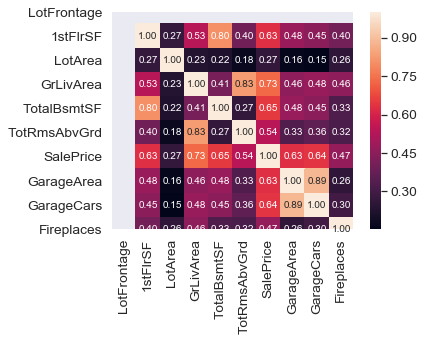

<Figure size 432x288 with 0 Axes>

In [44]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'LotFrontage')['LotFrontage'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig('saleprice_corr.png')

In [45]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC',  'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 84)


In [46]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
haspool,15.494756
LotArea,13.109495
LowQualFinSF,12.084539
...,...
GarageCond,-3.594290
GarageYrBlt,-3.904632
hasgarage,-3.939453
Functional,-4.054126


In [47]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 64 skewed numerical features to Box Cox transform


In [48]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 225)


In [49]:
train = all_data[:ntrain]
test = all_data[ntrain:]

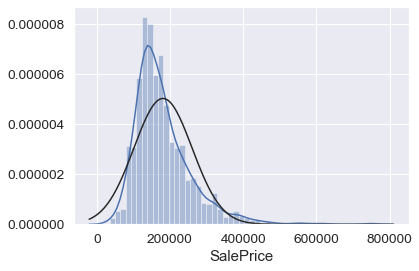

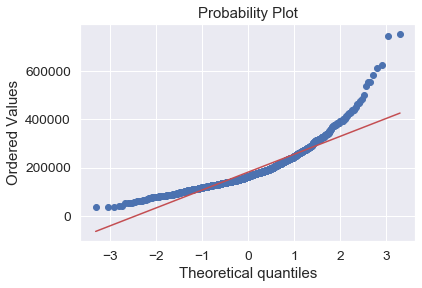

In [50]:
#histogram and normal probability plot
# y_train = np.log1p(y_train)
sns.distplot(y_train, fit=norm);
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

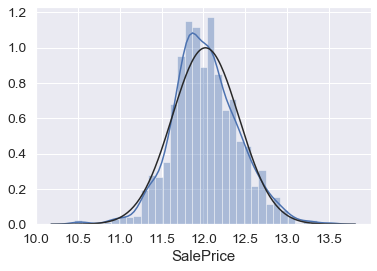

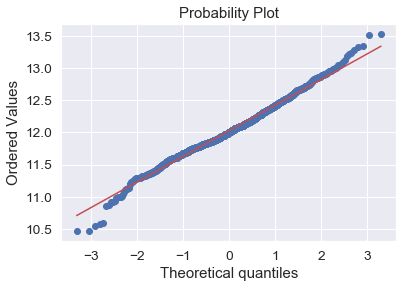

In [51]:
#histogram and normal probability plot
y_train = np.log1p(y_train)
sns.distplot(y_train, fit=norm);
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

## Machine Learning

In [52]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingRegressor
import xgboost as xgb
import lightgbm as lgb

In [53]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

**Base models**
* LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's **Robustscaler()** method on pipeline

In [54]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

* Kernel Ridge Regression :

In [55]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

* Elastic Net Regression :
again made robust to outliers

In [56]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

* Gradient Boosting Regression : <br>
With **huber** loss that makes it robust to outliers

In [57]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

* XGBoost :

In [58]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

* LightGBM :

In [59]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### Base models scores

In [60]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1099 (0.0142)

ElasticNet score: 0.1098 (0.0143)

Kernel Ridge score: 0.1134 (0.0142)

Gradient Boosting score: 0.1139 (0.0155)

Xgboost score: 0.1152 (0.0157)

LGBM score: 0.1134 (0.0176)



In [61]:
lasso_model_full_data = lasso.fit(train.values, y_train)

ENet_model_full_data = ENet.fit(train.values, y_train)

KRR_model_full_data = KRR.fit(train.values, y_train)

GBoost_model_full_data = GBoost.fit(train.values, y_train)

xgb_model_full_data = model_xgb.fit(train.values, y_train)

lgb_model_full_data = model_lgb.fit(train.values, y_train)


## Stacking models
#### Simplest Stacking approach : Averaging base models
We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

**Averaged base models class**

In [62]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

**Averaged base models score** <br>
We just average four models here **ENet, GBoost, KRR and lasso.** Of course we could easily add more models in the mix.


In [63]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1067 (0.0145)



##### Less simple Stacking : Adding a Meta-model <br>
In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

The procedure, for the training part, may be described as follows:

1. Split the total training set into two disjoint sets (here train and .holdout )
2. Train several base models on the first part (train)
3. Test these base models on the second part (holdout)
4. Use the predictions from 3) (called out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.

In [64]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [65]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [66]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [67]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07817272645631176


In [68]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07082050430702008


In [69]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07891628035711348


In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
sub = pd.DataFrame()
sub['Id'] =test_id
sub['SalePrice'] = ensemble
sub.to_csv('data/submission_3.csv',index=False)

In [ ]:
train[train.isna().any(axis=1)]

In [ ]:
y_train[y_train.isna() != False]

In [70]:
sub = pd.DataFrame()
sub['Id'] =test_id
sub['SalePrice'] = stacked_pred
sub.to_csv('data/submission_5.csv',index=False)